## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

- Channel_Code: A customer acquisition channel is any place your customers meet your brand for the first time — whether through social media, organic search, or a paid ad. Customer acquisition channels are how you bring in new customers.

- Vintage: Vintage is a colloquial term used to describe mortgage-backed securities (MBS) that have been "seasoned." That is, they've been issued long enough, and enough on-time payments have been made, that the risk of default is lower. Vintage is the age of an item as it relates to the year it was created.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import  export_graphviz
import pydotplus, graphviz

from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\avina\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 15)

In [3]:
df_train = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\train_s3TEQDk.csv")
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [4]:
df_test = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\test_mSzZ8RL.csv")
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [5]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


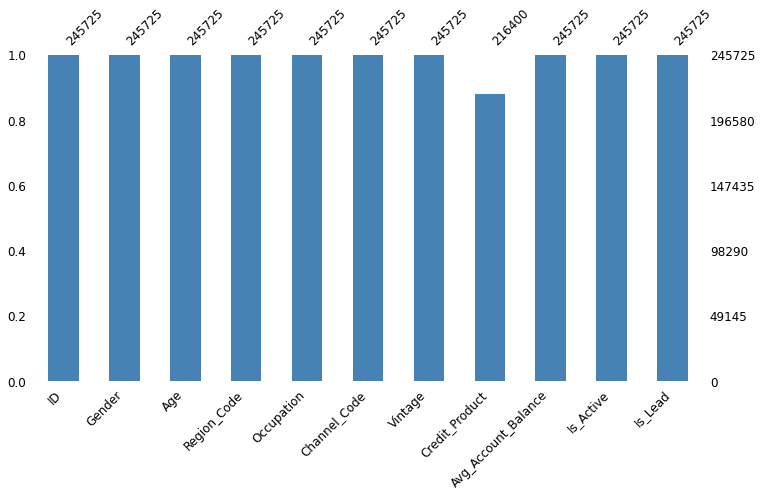

In [7]:
import missingno as msno
msno.bar(df_train, figsize=(12, 6), fontsize=12, color='steelblue')

In [8]:
df_train = df_train.dropna()

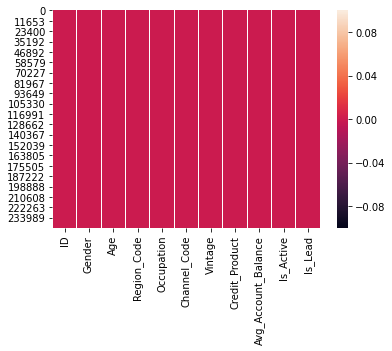

In [9]:
sns.heatmap(df_train.isna())

In [10]:
df_train.shape

(216400, 11)

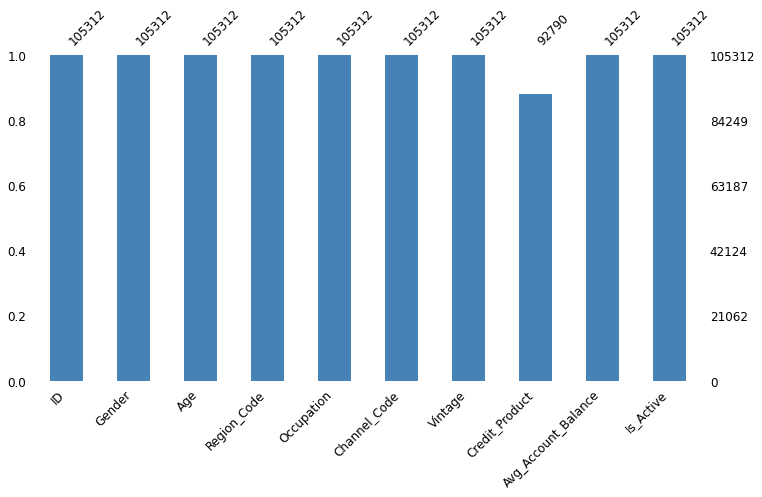

In [11]:
import missingno as msno
msno.bar(df_test, figsize=(12, 6), fontsize=12, color='steelblue')

In [12]:
df_test['Credit_Product'].fillna(df_test['Credit_Product'].mode()[0],inplace=True)
df_test['Credit_Product'].isna().sum()

0

In [13]:
for features in df_train.columns:
    print(f"{features}:{df_train[features].nunique()}")
    

ID:216400
Gender:2
Age:63
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:125953
Is_Active:2
Is_Lead:2


In [14]:
for features in df_test.columns:
    print(f"{features}:{df_test[features].nunique()}")

ID:105312
Gender:2
Age:62
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:78315
Is_Active:2


In [15]:
for features in ['Credit_Product','Is_Active']:
    df_train[features] = df_train[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [16]:
#df_train['Credit_Product'] = df_train['Credit_Product'].astype(int)

In [17]:
df_train['Gender'] = df_train['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [18]:
#df_train['Credit_Product'].ast

In [19]:
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0
5,ACUTYTWS,1,56,RG261,Self_Employed,X1,32,0,544163,1,0
7,JJNJUQMQ,0,48,RG265,Self_Employed,X3,13,0,444724,1,0
8,ZMQFYKCB,0,40,RG283,Self_Employed,X2,38,0,1274284,0,0
9,NVKTFBA2,0,55,RG268,Self_Employed,X2,49,1,2014239,0,0
10,NVC424KZ,1,53,RG254,Self_Employed,X3,123,0,980664,1,0


In [20]:
for features in ['Credit_Product','Is_Active']:
    df_test[features] = df_test[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [21]:
df_test['Gender'] = df_test['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [22]:
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,Other,X1,25,1,742366,0
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,925537,0
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,215949,0
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,657087,0
5,MZZAQMPT,1,60,RG268,Self_Employed,X3,110,0,4624262,0
6,Y88TW36I,0,69,RG253,Other,X2,67,0,1032764,0
7,3UGOAQNU,0,30,RG257,Salaried,X1,33,0,837009,0
8,VVUKMUJT,1,43,RG284,Salaried,X3,81,0,1001232,1
9,9R363ZXS,0,54,RG283,Self_Employed,X2,37,1,1667851,0


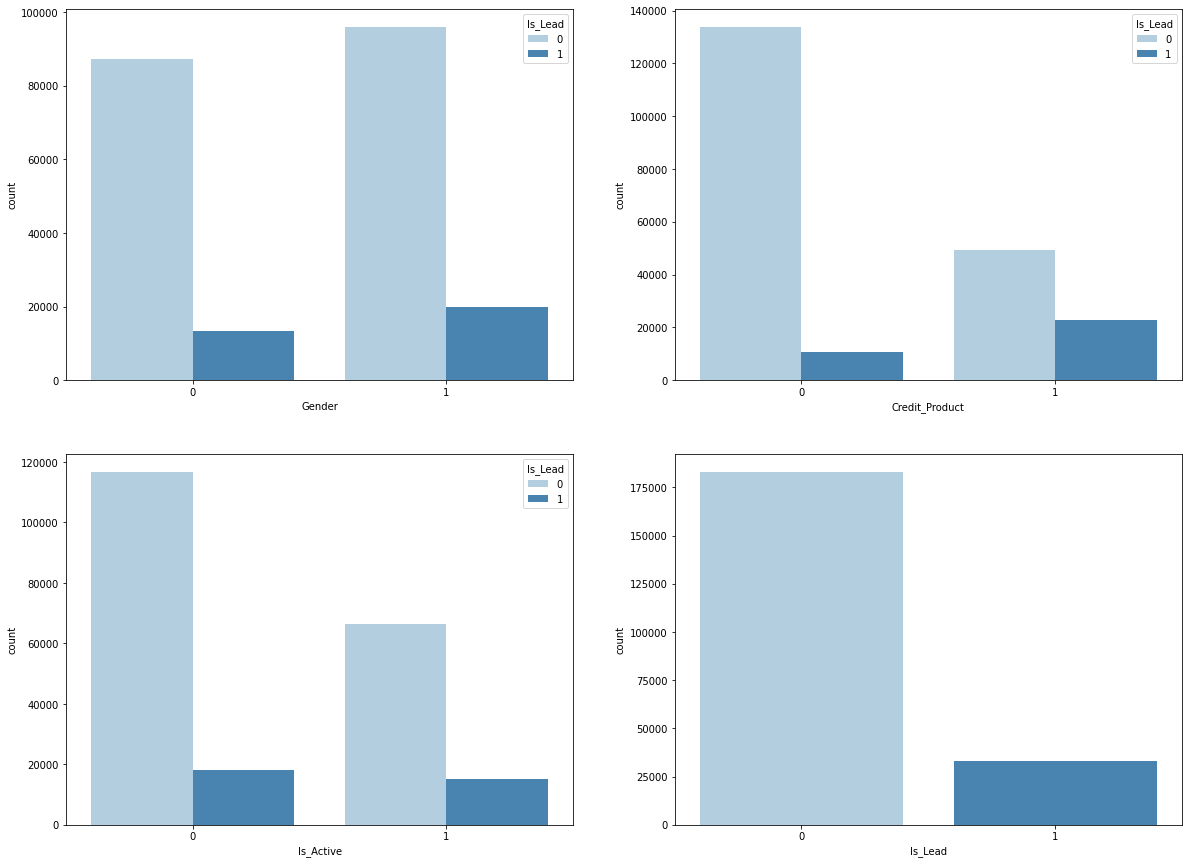

In [23]:
#visualizing the binary features
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
#sns.countplot(df_train['Gender'])
sns.countplot(x="Gender", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,2)
#sns.countplot(df_train['Credit_Product'])
sns.countplot(x="Credit_Product", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,3)
#sns.countplot(df_train['Is_Active'])
sns.countplot(x="Is_Active", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,4)
sns.countplot(df_train['Is_Lead'],palette="Blues")

In [24]:
df_train['Occupation'].value_counts()

Self_Employed    86120
Salaried         67783
Other            60846
Entrepreneur      1651
Name: Occupation, dtype: int64

In [25]:
df_train['Channel_Code'].value_counts()

X1    100660
X2     55892
X3     54995
X4      4853
Name: Channel_Code, dtype: int64

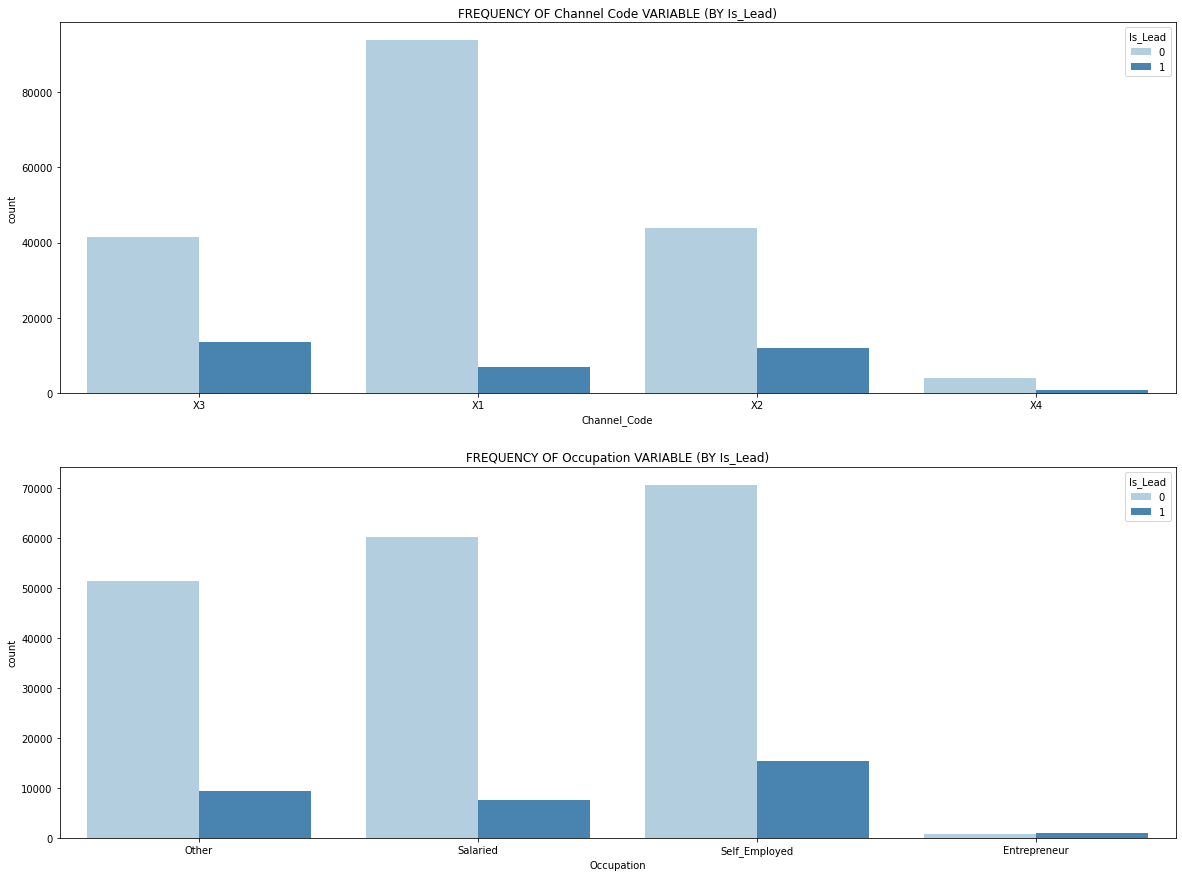

In [26]:
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor='white')

#ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0,0])
ax1 = sns.countplot(x="Channel_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0])
ax1.title.set_text('FREQUENCY OF Channel Code VARIABLE (BY Is_Lead)')
ax2 = sns.countplot(x="Occupation", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[1])
ax2.title.set_text('FREQUENCY OF Occupation VARIABLE (BY Is_Lead)')

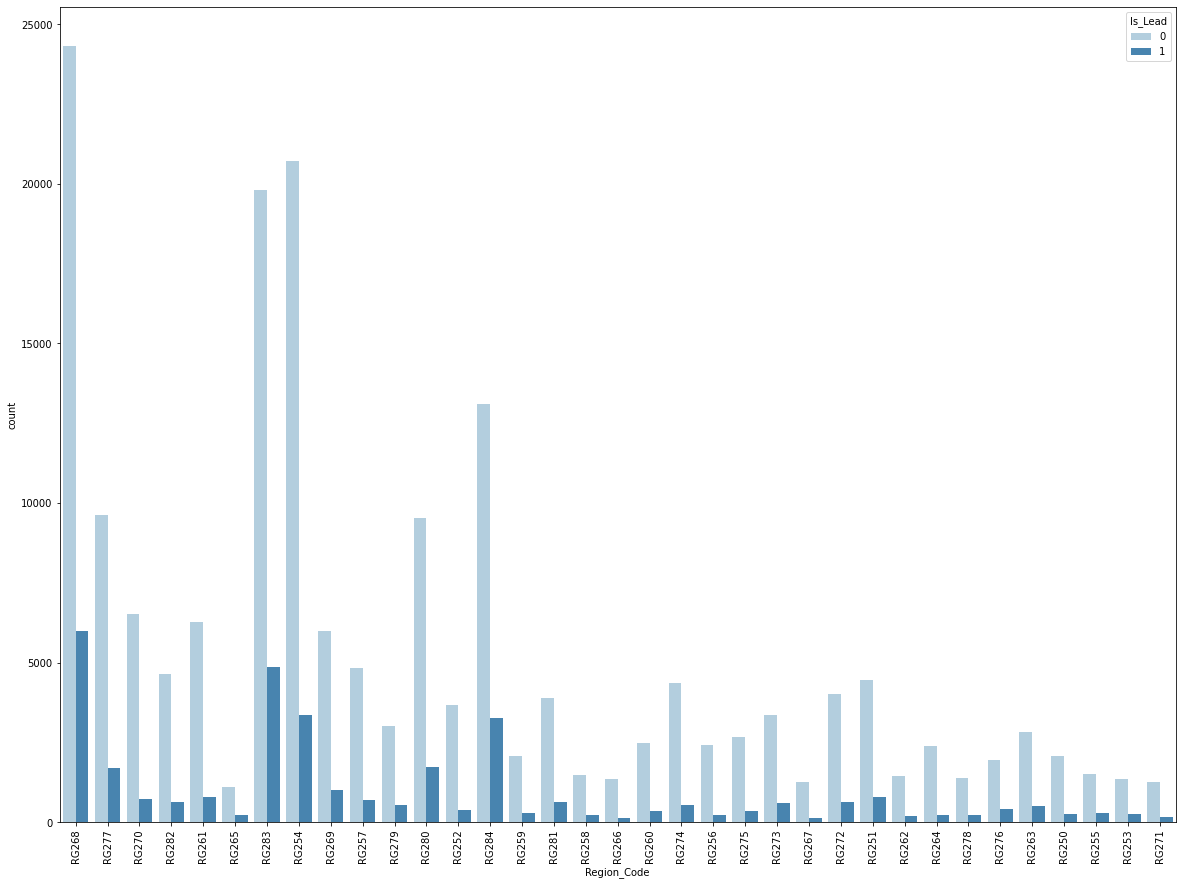

In [27]:
plt.figure(figsize =(20,15))
plt.xticks(rotation=90)
ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues")

In [28]:
yeah = df_train['Is_Lead'].value_counts()
no = yeah[0]
yes = yeah[1]
print(yes,no)

33313 183087


In [29]:
yes_perc = round(yes/len(df_train)*100, 1)
no_perc = round(no/len(df_train)*100, 1)
print(yes_perc,no_perc)

15.4 84.6


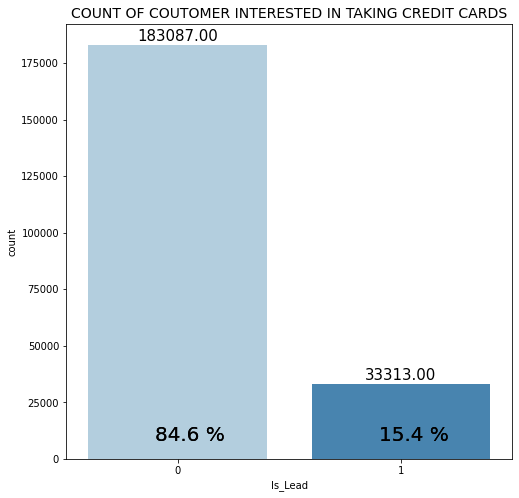

In [30]:
# Defining the plot size
plt.figure(figsize=(8, 8))

  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=20)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=20)
  

  
# Setting the title for the graph
plt.title('COUNT OF COUTOMER INTERESTED IN TAKING CREDIT CARDS', size=14)
  
# Fianlly showing the plot
plt.show()

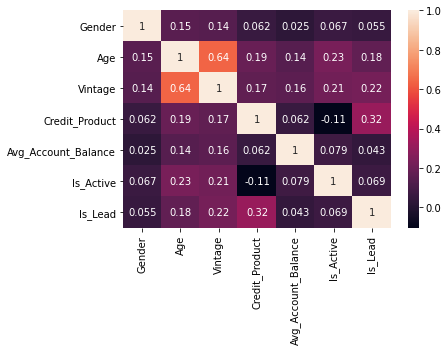

In [31]:
sns.heatmap(df_train.corr(),annot=True)

In [32]:
df_train['Is_Lead'].value_counts()

0    183087
1     33313
Name: Is_Lead, dtype: int64

In [33]:
df_train.groupby('Credit_Product')['Is_Lead'].sum()

Credit_Product
0    10623
1    22690
Name: Is_Lead, dtype: int64

In [34]:
# Univariate Analysis on Credit_Score
yes_perc = np.round((df_train['Credit_Product'].value_counts()[1]/len(df_train))*100,1)
no_perc = np.round((df_train['Credit_Product'].value_counts()[0]/len(df_train))*100,1)
yes_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df_train['Is_Lead'].value_counts()[1]))*100,1)
no_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df_train['Is_Lead'].value_counts()[1]))*100,1)

In [35]:
                          
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

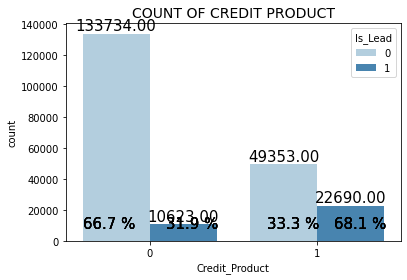

In [36]:
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Credit_Product',hue = 'Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.4, 8000), size=15)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.7, 8000), size=15)
    plots.annotate(str(no_perc_Islead)+" %", xy=(-0.3, 15000), xytext=(0.1, 8000), size=15)
    plots.annotate(str(yes_perc_Islead)+" %", xy=(0.7, 15000), xytext=(1.1, 8000), size=15)
  

  
# Setting the title for the graph
plt.title('COUNT OF CREDIT PRODUCT', size=14)
  
# Fianlly showing the plot
plt.show()

In [37]:
df_train['Age'].describe()

count    216400.000000
mean         42.807315
std          14.850996
min          23.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          85.000000
Name: Age, dtype: float64

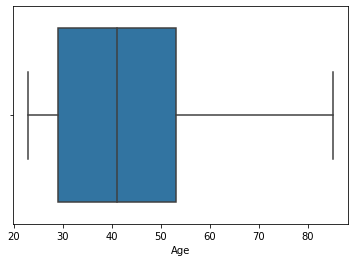

In [38]:
sns.boxplot('Age',hue='Is_Lead',data=df_train)

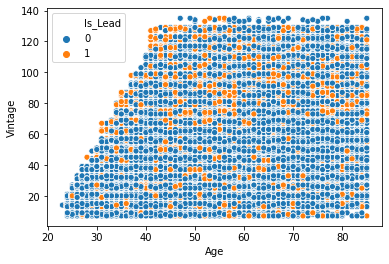

In [39]:
sns.scatterplot(x='Age',y='Vintage',hue='Is_Lead',data=df_train)

In [40]:
Channelcode_enc = pd.get_dummies(df_train['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_train_final = pd.concat([df_train,Channelcode_enc],axis=1)

Channelcode_enc_test = pd.get_dummies(df_test['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_test_final = pd.concat([df_test,Channelcode_enc_test],axis=1)

In [41]:
df_train_final

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0,1,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245719,DQ48DATH,0,38,RG280,Salaried,X2,13,1,354665,0,0,1,0,0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0,0,0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0,0,0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0,0,0


In [42]:
Occupation_enc = pd.get_dummies(df_train_final['Occupation'],prefix='Occupation',drop_first=True)
df_train_final = pd.concat([df_train_final,Occupation_enc],axis=1)

Occupation_enc_test = pd.get_dummies(df_test_final['Occupation'],prefix='Occupation',drop_first=True)
df_test_final = pd.concat([df_test_final,Occupation_enc_test],axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_final['Region_Code'] = le.fit_transform(df_train_final['Region_Code'])
df_test_final['Region_Code'] = le.fit_transform(df_test_final['Region_Code'])

In [44]:
df_train_final.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,...,Is_Lead,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,NNVBBKZB,0,73,18,Other,X3,43,...,0,0,1,0,1,0,0
1,IDD62UNG,0,30,27,Salaried,X1,32,...,0,0,0,0,0,1,0
2,HD3DSEMC,0,56,18,Self_Employed,X3,26,...,0,0,1,0,0,0,1
3,BF3NC7KV,1,34,20,Salaried,X1,19,...,0,0,0,0,0,1,0
4,TEASRWXV,0,30,32,Salaried,X1,33,...,0,0,0,0,0,1,0


In [45]:
df_test_final.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,...,Is_Active,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,VBENBARO,1,29,4,Other,X1,25,...,0,0,0,0,1,0,0
1,CCMEWNKY,1,43,18,Other,X2,49,...,0,1,0,0,1,0,0
2,VK3KGA9M,1,31,20,Salaried,X1,14,...,0,0,0,0,0,1,0
3,TT8RPZVC,1,29,22,Other,X1,33,...,0,0,0,0,1,0,0
4,SHQZEYTZ,0,29,20,Other,X1,19,...,0,0,0,0,1,0,0


In [46]:
df_train_final = df_train_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

df_test_final = df_test_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

df_train_final.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,0,73,43,0,1045696,0,0,0,1,0,1,0,0
1,0,30,32,0,581988,0,0,0,0,0,0,1,0
2,0,56,26,0,1484315,1,0,0,1,0,0,0,1
3,1,34,19,0,470454,0,0,0,0,0,0,1,0
4,0,30,33,0,886787,0,0,0,0,0,0,1,0


In [47]:
df_test_final.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,1,29,25,1,742366,0,0,0,0,1,0,0
1,1,43,49,0,925537,0,1,0,0,1,0,0
2,1,31,14,0,215949,0,0,0,0,0,1,0
3,1,29,33,0,868070,0,0,0,0,1,0,0
4,0,29,19,0,657087,0,0,0,0,1,0,0


In [48]:
df_test_final.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed'],
      dtype='object')

In [49]:
df_train_final.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Is_Lead', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed'],
      dtype='object')

In [50]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_df = scaler.fit_transform(df_train_final)
scaled_train_df = pd.DataFrame(scaled_train_df, columns=df_train_final.columns)

scaled_train_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,0.0,0.806452,0.281250,0.0,0.099205,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.112903,0.195312,0.0,0.054321,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.532258,0.148438,0.0,0.141660,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.177419,0.093750,0.0,0.043525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.112903,0.203125,0.0,0.083823,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216395,0.0,0.241935,0.046875,1.0,0.032317,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
216396,1.0,0.064516,0.062500,0.0,0.081516,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
216397,0.0,0.048387,0.046875,0.0,0.062903,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
216398,0.0,0.080645,0.187500,0.0,0.037432,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
scaled_test_df = scaler.fit_transform(df_test_final)
scaled_test_df = pd.DataFrame(scaled_test_df, columns=df_test_final.columns)

scaled_test_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,1.0,0.081967,0.140625,1.0,0.072805,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.311475,0.328125,0.0,0.091333,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.114754,0.054688,0.0,0.019558,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.081967,0.203125,0.0,0.085520,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.081967,0.093750,0.0,0.064179,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1.0,0.459016,0.617188,1.0,0.426851,1.0,1.0,0.0,0.0,0.0,1.0,0.0
105308,1.0,0.508197,0.617188,1.0,0.114963,0.0,1.0,0.0,0.0,1.0,0.0,0.0
105309,1.0,0.180328,0.062500,0.0,0.170047,0.0,0.0,0.0,1.0,0.0,1.0,0.0
105310,1.0,0.475410,0.671875,0.0,0.072280,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
print(scaled_train_df.shape)
print(scaled_test_df.shape)

(216400, 13)
(105312, 12)


In [53]:
X = scaled_train_df.copy()

In [54]:
y_train = X.pop('Is_Lead')
X_train= X

In [55]:
len(X_train.columns)

12

# MOdel Building:-

## Random Forest Classifier

### K fold cross validation

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [57]:

rf = RandomForestClassifier(random_state=42)

In [58]:
param_rf = {
    'bootstrap': [False],
    'max_depth': [15],
    'max_features': [7],
    'min_samples_leaf': [30],
    'n_estimators': [1000]
}

In [59]:
grid_search = GridSearchCV(estimator= rf, param_grid = param_rf, cv = 4, n_jobs=-1, verbose=1, scoring="roc_auc")

In [60]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 20.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 20.0min finished


Wall time: 28min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [15],
                         'max_features': [7], 'min_samples_leaf': [30],
                         'n_estimators': [1000]},
             scoring='roc_auc', verbose=1)

In [61]:
#best score from grid search results
grid_search.best_score_

0.7993847130706164

In [62]:
#best estimators from grid search results
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=15, max_features=7,
                       min_samples_leaf=30, n_estimators=1000, random_state=42)

In [63]:
rf_best = grid_search.best_estimator_

In [64]:
def evaluate_model(rf):
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(scaled_test_df)
    print('Train set Performance')
    print(f'Accuracy is {accuracy_score(y_train, y_train_pred)}')
    print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred)}')
    print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred)}')

In [65]:
evaluate_model(rf_best)

Train set Performance
Accuracy is 0.8737892791127542
Confusion Matrix : 
 [[180014   3073]
 [ 24239   9074]]
ROC_AUC_Score: 0.627800892641416


In [66]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, max_features=7,
                       min_samples_leaf=30, n_estimators=1000, random_state=42)

In [67]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(scaled_test_df)

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

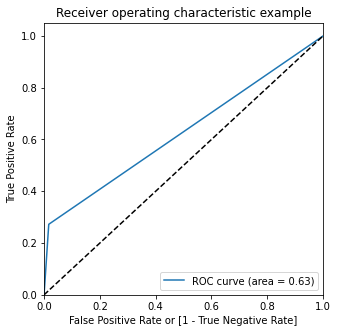

In [69]:
fpr, tpr, thresholds = roc_curve( y_train, y_train_pred, drop_intermediate = False )

#draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Islead_Prob)

draw_roc(y_train,y_train_pred)

In [70]:
df_rf = pd.DataFrame()
df_rf['ID'] = df_test['ID']
df_rf['Is_Lead'] = y_test_pred

df_rf.to_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\rf_lat.csv")